# Alphavirus RdRp conservation Analysis

In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import Entrez, SeqIO, AlignIO

#import sys
#sys.path.append('MyModules/')
#from retrieve_ProtSeq import retrive_protSEQ_from_accesionIDS

pd.set_option('display.max_columns', 110)

## Shannon Entropy

Entropy measures the amount of information or uncertainty in the column. Lower entropy indicates more order or less randomness (high conservation), and higher entropy suggests more disorder or greater randomness (less conservation).

The formula for Shannon entropy is given by:

$$
H = -\sum_{i=1}^{n} p_i \log_2 p_i
$$

Where:
- \( H \) is the Shannon entropy,
- \( p_i \) represents the probability of each unique character occurring at a position in the sequence,
- The sum is taken over all unique characters.

## Effective Number (N<sub>eff</sub>)

Given the entropy \(H\) in natural log at different positions in a alignment, the effective number (Neff) can be calculated using the following formula:
Neff represents the "effective diversity" or "effective redundancy" in a aligment column. In the context of th 20 natural amino acid, neff of 1, mean the column is complety conserved, where we have just o amino acid across the position aligned. A neff of 20, means complete random, where all 20 amino acids where  found, in equally porpotion.


#### Effective Number Calculation N<sub>eff</sub>

The effective number N<sub>eff</sub> for each position, derived from the entropy, is given by:

$$
N_{eff} = e^H
$$



In [ ]:
def calculate_entropy(column):
    """Calculate the Shannon entropy of a column in the alignment."""
    column_list = [x for x in column if x != '-'] # Remove gaps, if they exist
    
    unique, counts = np.unique(column_list, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log(probabilities)) # - ensure that after summation of each AA entropy the result is positive. I can use log2 to make the results in bits, as the weblog
    return entropy


def neff(entropies):
    #neff = [np.exp(H) for H in entropies]
    neff = np.exp(entropies)
    return neff

## Colecting the data

In [48]:
data = pd.read_excel('data/VMR_MSL38_v2_ICTV.xlsx')
data = data.query('Genus=="Alphavirus"')
print(data.shape)
data.head()

(54, 26)


In [ ]:
#ids = list(data['Virus GENBANK accession'].values)


# filename = f"data/alphavirus/alphavirus_non_structural_proteins.txt"
# os.system(f"rm {filename}")

# with open(filename, "a") as file:
#     file.write(f"AccessionNumber\tProteinID\tProteinName\tOrganism\tDescription\tSequence\n")
#     for accession_number in ids:
#         print(f"Downloading {accession_number}")
#         handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="gb", retmode="text", email="luiz.vieira@utexas.edu")
#         record = SeqIO.read(handle, "genbank")
#         for feature in record.features:
#             if feature.type == "CDS":
#                     protein_id = None
#                     protein_name = None
#                     description = None
#                     organism = None
#                     protein_sequence = None
                    
#                     try:
#                         protein_id = feature.qualifiers.get("protein_id")[0]
#                         protein_name =  feature.qualifiers.get('product')[0]
#                         organism = record.annotations.get("organism", '')
#                         protein_sequence = feature.qualifiers.get("translation")[0]
#                         if feature.qualifiers.get('note'):
#                             description = feature.qualifiers.get('note')[0]
#                     except TypeError:
#                         continue
                  

#                     file.write(f"{accession_number}\t{protein_id}\t{protein_name}\t{organism}\t{description}\t{protein_sequence}\n")

In [4]:
filename = f"data/alphavirus/alphavirus_proteins_annotation.txt"
meta_data = pd.read_csv(filename, sep='\t')

nsp_list=[
    'nonstructural polyprotein', 'non structural polyprotein',
    'non-structural polyprotein', 'nsP1234 polyprotein', 'nsp1234', 'polyprotein 2',
    'non-structural polyprotein precursor P1234',  'nonstructural polyprotein nsP1-nsP2-nsP3-nsP4',
    'polyprotein of non-structural proteins', 'putative nonstructural polyprotein precursor']

nsp = meta_data[meta_data['ProteinName'].isin(nsp_list)]
print(nsp.shape)
nsp.head()

(48, 6)


,AccessionNumber,ProteinID,ProteinName,Organism,Description,Sequence
1,AF126284,AAD13623.1,polyprotein 2,Aura virus,NaN,MNSVFYNPFGRGAYAQPPIAWRPRRRAAPAPRPSGLTTQIQQLTRA...
2,U73745,AAB40701.1,nonstructural polyprotein,Barmah Forest virus,NaN,MAKPVVKIDVEPESHFAKQVQSCFPQFEIEAVQTTPNDHAHARAFS...
4,HM147985,AEJ36224.1,non structural polyprotein,Bebaru virus,NaN,MNKVHVDIDEESPFLKSLQRAFPSLEIEAKQVTANDHACARAFSHL...
6,MK353339,QBM15857.1,nonstructural polyprotein,Caaingua virus,NaN,MEKVKVHVDLDPEDRYVAELQRCFPNFEIEAKQTSPNDHARARAFS...
8,AF075259,AAD14566.1,nonstructural polyprotein,Cabassou virus,"possible incorporation of arginine, cysteine, ...",MEKVHVDIEEDSPFLRALQRSFPQFEVEAKQVTDNDHANARAFSHL...


In [5]:
# with open('data/alphavirus/alphavirus_non_structural_proteins.fasta', 'w') as file:
#     for index, row in nsp.iterrows():
#         file.write(f">{row['ProteinID']} | {row['ProteinName']} | {row['Organism']}\n")
#         file.write(f"{row['Sequence']}\n")

In [ ]:
#mafft --auto data/alphavirus/alphavirus_non_structural_proteins.fasta > data/alphavirus/alphavirus_non_structural_proteins_aligned.fasta

In [5]:
# those sequences do not have nsp4, so they were removed from the alignment
seqs_no_nsp4 = ['AAD13623.1','AEJ36223.1','AAM10629.1','AEJ36224.1','AAC19326.1','AEJ36226.1','AEJ36232.1','AAC19323.2','AEQ61910.1','AEJ36230.1','AEJ36234.1','AEJ36238.1','AAB40701.1','AEJ36236.1']

nsp_with_nsp4 = nsp[~nsp['ProteinID'].isin(seqs_no_nsp4)]
nsp_with_nsp4.head()

,AccessionNumber,ProteinID,ProteinName,Organism,Description,Sequence
6,MK353339,QBM15857.1,nonstructural polyprotein,Caaingua virus,NaN,MEKVKVHVDLDPEDRYVAELQRCFPNFEIEAKQTSPNDHARARAFS...
8,AF075259,AAD14566.1,nonstructural polyprotein,Cabassou virus,"possible incorporation of arginine, cysteine, ...",MEKVHVDIEEDSPFLRALQRSFPQFEVEAKQVTDNDHANARAFSHL...
10,AF369024,AAN05101.1,nonstructural polyprotein,Chikungunya virus,"contains nsp1, nsp2, nsp3, and nsp4 proteins",MDPVYVDIDADSAFLKALQRAYPMFEVEPRQVTPNDHANARAFSHL...
12,KP003813,AJD20059.2,non-structural polyprotein,Chikungunya virus,NaN,MDPVYVDIDADSAFLKALQRAYPMFEVESRQVTPNDHANARAFSHL...
17,AF075251,AAD14550.1,nonstructural polyprotein,Everglades virus,"possible incorporation of arginine, cysteine, ...",MEKVHVDIEEDSPFLRALQRSFPQFEVEAKQVTDNDHANARAFSHL...


In [21]:
# with open('data/alphavirus/alphavirus_non_structural_proteins_contains_nsp4.fasta', 'w') as file:
#     for index, row in nsp_with_nsp4.iterrows():
#         file.write(f">{row['ProteinID']} | {row['ProteinName']} | {row['Organism']}\n")
#         file.write(f"{row['Sequence']}\n")

In [ ]:
#mafft --auto data/alphavirus/alphavirus_non_structural_proteins_contains_nsp4.fasta > data/alphavirus/alphavirus_non_structural_proteins_contains_nsp4_aligned.fasta

In [ ]:
seqs = [
    'QBM15857.1','AAD14558.1','AAD14554.1','AAD14566.1','ABP73665.1','AIM46755.1','AAD14560.1','AAB04682.2','ACT68008.1',
    'ACO59901.1','AAD14550.1','AAF28339.1','CAA27741.1','AHL83800.1','AAL79763.1','ABL84688.1','AAD14564.1','AAK66989.1',
    'ACT75287.1','AAC83378.1','AAD14556.1','AAD14562.1','AAU85259.1','ABK32031.1','AAA96972.1','ACV66991.1','AAA96329.1',
    'AAC97204.1','AAC97206.1','AAN05101.1','AJD20059.2']



In [4]:
# removing those putative sequences
for seq in SeqIO.parse('data/alphavirus/alphavirus_non_structural_proteins_contains_nsp4.fasta', 'fasta'):
    if seq.id not in seqs:
        print(seq.id)


CAC87660.1
AAC19321.2
AAC19324.1


In [ ]:
#mafft --auto data/alphavirus/alphavirus_non_structural_proteins_contains_nsp4_filtered.fasta > data/alphavirus/alphavirus_non_structural_proteins_contains_nsp4_filtered_aligned.fasta

# Data Visualization

### Chikungunia

In [13]:
handle = Entrez.efetch(db="protein", id='AAN05101.1', rettype="gb", retmode="text", email="luiz.vieira@utexas.edu")
record = SeqIO.read(handle, "genbank")
for feature in record.features:
    #print(feature)
    if feature.type == "Region":
        #if 'RdRp' in feature.qualifiers.get('note')[0]:
        print(feature.qualifiers.get('region_name')[0])
        print(feature.qualifiers.get('note')[0])
        print(feature.location)

Vmethyltransf
Viral methyltransferase; pfam01660
[24:380]
Viral_helicase1
Viral (Superfamily 1) RNA helicase; pfam01443
[718:957]
Peptidase_C9
Peptidase family C9; pfam01707
[963:1165]
Macro_X_Nsp3-like
X-domain (or Mac1 domain) of viral non-structural protein 3 and related macrodomains; cd21557
[1348:1476]
Togaviridae_RdRp
RNA-dependent RNA polymerase (RdRp) in the family Togaviridae of positive-sense single-stranded RNA [(+)ssRNA] viruses; cd23250
[2013:2471]


I checked some alignment in NCBI and the first 4 residues are MVDG  
and the last 3 residues are LYG, in total 14 sequences  
[link](https://www.ncbi.nlm.nih.gov/Structure/cdd/cddsrv.cgi?uid=438100)

In [7]:
nsp_chikun = nsp.query('ProteinID=="AAN05101.1"')['Sequence'].values[0] # total length 2474, index starts at 1

nsp4_chikun = nsp_chikun[2013:2471]
nsp4_chikun_extended = nsp_chikun[1863:2474]
nsp4_chikun

'MVDGSESCLDRATFNPSKLRSYPKQHAYHAPSIRSAVPSPFQNTLQNVLAAATKRNCNVTQMRELPTLDSAVFNVECFKKFACNQEYWEEFAASPIRITTENLTTYVTKLKGPKAAALFAKTHNLLPLQEVPMDRFTVDMKRDVKVTPGTKHTEERPKVQVIQAAEPLATAYLCGIHRELVRRLNAVLLPNVHTLFDMSAEDFDAIIAAHFKPGDTVLETDIASFDKSQDDSLALTALMLLEDLGVDHSLLDLIEAAFGEISSCHLPTGTRFKFGAMMKSGMFLTLFVNTLLNITIASRVLEDRLTKSACAAFIGDDNIIHGVVSDELMAARCATWMNMEVKIIDAVVSQKAPYFCGGFILHDIVTGTACRVADPLKRLFKLGKPLAAGDEQDEDRRRALADEVVRWQRTGLIDELEKAVYSRYEVQGISVVVMSMATFASSRSNFEKLRGPVVTLYG'

### ONNV - Onyong-nyong virus

In [ ]:
handle = Entrez.efetch(db="protein", id='AAC97204.1', rettype="gb", retmode="text", email="luiz.vieira@utexas.edu")
record = SeqIO.read(handle, "genbank")
for feature in record.features:
    #print(feature)
    if feature.type == "Region":
        #if 'RdRp' in feature.qualifiers.get('note')[0]:
        print(feature.qualifiers.get('region_name')[0])
        print(feature.qualifiers.get('note')[0])
        print(feature.location)

In [8]:
nsp_ONNV = nsp.query('ProteinID=="AAN05101.1"')['Sequence'].values[0]
nsp4_ONNV = nsp_ONNV[1863:2510]
nsp4_ONNV 

'YIFSSDTGPGHLQQKSVRQSVLPVNTLEEVHEEKCYPPKLDEAKEQLLLKKLQESASMANRSRYQSRKVENMKATIIQRLKRGCRLYLMSETPKVPTYRTTYPAPVYSPPINVRLSNPESAVAACNEFLARNYPTVSSYQITDEYDAYLDMVDGSESCLDRATFNPSKLRSYPKQHAYHAPSIRSAVPSPFQNTLQNVLAAATKRNCNVTQMRELPTLDSAVFNVECFKKFACNQEYWEEFAASPIRITTENLTTYVTKLKGPKAAALFAKTHNLLPLQEVPMDRFTVDMKRDVKVTPGTKHTEERPKVQVIQAAEPLATAYLCGIHRELVRRLNAVLLPNVHTLFDMSAEDFDAIIAAHFKPGDTVLETDIASFDKSQDDSLALTALMLLEDLGVDHSLLDLIEAAFGEISSCHLPTGTRFKFGAMMKSGMFLTLFVNTLLNITIASRVLEDRLTKSACAAFIGDDNIIHGVVSDELMAARCATWMNMEVKIIDAVVSQKAPYFCGGFILHDIVTGTACRVADPLKRLFKLGKPLAAGDEQDEDRRRALADEVVRWQRTGLIDELEKAVYSRYEVQGISVVVMSMATFASSRSNFEKLRGPVVTLYGGPK'

## Blast

In [ ]:
#makeblastdb -in data/alphavirus/alphavirus_non_structural_proteins_contains_nsp4.fasta -dbtype prot -input_type fasta -out data/alphavirus/nsp_db/nsp

In [ ]:
#blastp -db data/alphavirus/nsp_db/nsp -query data/alphavirus/chikungunya_nsp4.fasta -out data/alphavirus/res_blast_with_nsp4.txt

##### Result from  blast

#### CHKY
    query  1     MVDGSESCLDRATFNPSKLRSYPKQHAYHAPSIRSAVPSPFQNTLQNVLAAATKRNCNVT  60  
                 MVDGSESCLDRATFNPSKLRSYPKQHAYHAPSIRSAVPSPFQNTLQNVLAAATKRNCNVT  
    Sbjct  2493  MVDGSESCLDRATFNPSKLRSYPKQHAYHAPSIRSAVPSPFQNTLQNVLAAATKRNCNVT  2552  


    Query  419   AVYSRYEVQGISVVVMSMATFASSRSNFEKLRGPVVTLYG  458  
                 AVYSRYEVQGISVVVMSMATFASSRSNFEKLRGPVVTLYG  
    Sbjct  2913  AVYSRYEVQGISVVVMSMATFASSRSNFEKLRGPVVTLYG  2952  

#### ONNV - extended version
    Query  1     YIFSSDTGQGHLQQKSVRQTTLPVNIVEEVHEEKCYPPKLDEIKEQLLLKRLQESASTAN  60
                 YIFS+DTG GHLQ KSV Q  L    +E    E+ Y P LD  KE+ L  R Q   + AN
    Sbjct  2343  YIFSTDTGPGHLQMKSVLQNQLTEPTLERNVLERIYAPVLDTSKEEQLKLRYQMMPTEAN  2402

    Query  597   KKLRGPVVTLYGGPK  611
                 + +RG +  LYGGPK
    Sbjct  2941  QAIRGEIKHLYGGPK  2955




In [20]:
####################### those are only sequences from alphavirus ########################

seq_aligment = "data/alphavirus/alphavirus_non_structural_proteins_contains_nsp4_aligned.fasta"

alignment = AlignIO.read(seq_aligment, "fasta")

# create a dictionary with the sequences, to create a data frame
dict_align = {} 
for record in alignment:
    # removing / added during alignment
    dict_align[record.id.split('/')[0]] = list(record.seq)
# create a data frame with the sequences aligned
mtx = pd.DataFrame.from_dict(dict_align, orient='index')
nsp4_mtx_annot_sites = mtx.iloc[:, 2343-1:2955].copy() # ONNV
nsp4_mtx_annot_sites

,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355,2356,2357,2358,2359,2360,2361,2362,2363,2364,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396,...,2900,2901,2902,2903,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943,2944,2945,2946,2947,2948,2949,2950,2951,2952,2953,2954
QBM15857.1,Y,I,F,S,S,D,T,G,P,G,H,L,Q,Q,Q,S,V,R,Q,H,D,L,P,L,P,T,W,E,R,K,L,P,E,I,F,H,P,P,R,F,N,A,A,K,E,E,L,L,R,H,R,M,Q,M,A,...,W,N,R,V,G,I,R,E,Q,L,K,K,S,L,F,S,R,Y,G,V,Q,F,T,D,L,V,L,D,G,L,S,C,L,S,K,S,I,K,N,F,N,H,L,R,G,T,L,R,H,L,Y,V,-,-,-
AAD14566.1,Y,I,F,S,S,D,T,G,Q,G,H,L,Q,Q,K,S,V,R,Q,T,V,L,S,E,V,V,L,E,R,T,L,L,D,D,V,Y,A,P,R,L,D,L,N,K,E,E,L,L,R,K,K,L,Q,L,N,...,W,N,R,A,G,I,S,V,E,L,C,K,A,V,E,S,R,Y,E,I,V,G,T,S,I,I,I,A,A,M,A,T,L,A,R,N,V,A,T,F,K,H,L,R,G,N,P,I,H,L,Y,G,-,-,-
AAN05101.1,Y,I,F,S,S,D,T,G,P,G,H,L,Q,Q,K,S,V,R,Q,S,V,L,P,V,N,T,L,E,E,V,H,E,E,K,C,Y,P,P,K,L,D,E,A,K,E,Q,L,L,L,K,K,L,Q,E,S,...,W,Q,R,T,G,L,I,D,E,L,E,K,A,V,Y,S,R,Y,E,V,Q,G,I,S,V,V,V,M,S,M,A,T,F,A,S,S,R,S,N,F,E,K,L,R,G,P,V,V,T,L,Y,G,G,P,K
AJD20059.2,Y,I,F,S,S,D,T,G,P,G,H,L,Q,Q,K,S,V,R,Q,S,V,L,P,V,N,T,L,E,E,V,H,E,E,K,C,Y,P,P,K,L,D,E,A,K,E,Q,L,L,L,K,K,L,Q,E,S,...,W,Q,R,T,G,L,I,D,E,L,E,K,A,V,Y,S,R,Y,E,V,Q,G,I,S,V,V,V,M,S,M,A,T,F,A,S,S,R,S,N,F,E,K,L,R,G,P,V,I,T,L,Y,G,G,P,K
AAD14550.1,Y,I,F,S,S,D,T,G,Q,G,H,L,Q,Q,K,S,V,R,Q,T,V,L,S,E,V,V,L,E,R,T,E,L,E,I,S,Y,A,P,R,L,D,L,E,K,E,E,L,L,R,K,K,L,Q,L,N,...,W,N,R,V,G,I,L,P,E,L,C,K,A,V,E,S,R,Y,E,T,V,G,T,S,V,I,V,M,A,M,A,T,L,A,S,S,V,K,S,F,S,Y,L,R,G,A,S,I,T,L,Y,G,-,-,-
ACT68008.1,Y,I,F,S,S,E,T,G,Q,G,H,L,Q,Q,K,S,N,R,Q,G,P,Y,V,Y,P,V,L,E,K,S,V,H,E,K,F,Y,A,P,R,L,D,M,E,K,E,K,I,L,Q,K,K,L,Q,L,C,...,W,N,R,I,G,I,T,D,E,I,V,K,A,V,E,S,R,Y,E,I,S,L,A,R,L,I,I,M,A,L,T,T,L,A,A,S,V,D,N,F,K,N,I,R,G,Q,P,I,I,L,Y,G,-,-,-
AAU85259.1,Y,I,F,S,S,D,T,G,P,G,H,L,Q,Q,K,S,V,R,Q,H,E,L,P,C,E,T,L,Y,A,H,E,D,E,R,I,Y,P,P,A,F,D,G,E,K,E,K,V,L,Q,A,K,M,Q,M,A,...,W,S,R,I,G,L,R,E,E,L,D,V,A,L,S,S,R,Y,Q,V,S,G,V,G,N,I,T,R,A,M,S,T,L,S,K,S,L,K,S,F,R,K,I,R,G,P,I,I,H,L,Y,G,G,P,K
ABK32031.1,Y,I,F,S,S,D,T,G,P,G,H,L,Q,Q,K,S,V,R,Q,H,E,L,P,C,E,T,L,Y,A,H,E,D,E,R,I,Y,P,P,A,F,D,G,E,K,E,K,V,L,Q,A,K,M,Q,M,A,...,W,S,R,I,G,L,R,E,E,L,D,V,A,L,S,S,R,Y,Q,V,S,G,V,G,N,I,T,R,A,M,S,T,L,S,K,N,L,K,S,F,R,K,I,R,G,P,I,I,H,L,Y,G,G,P,K
ACO59901.1,Y,I,F,S,S,E,T,G,Q,G,H,L,Q,Q,K,S,V,R,Q,C,K,L,Q,D,A,V,L,E,R,V,T,H,E,K,Y,Y,A,P,R,L,D,L,E,K,E,K,L,L,Q,K,K,L,Q,L,C,...,W,N,R,I,G,I,T,S,E,L,V,K,A,V,E,S,R,Y,E,V,V,L,S,S,L,I,I,I,A,L,S,T,L,A,D,S,V,K,N,F,K,R,I,R,G,N,P,I,T,L,Y,G,-,-,-
AHL83800.1,Y,I,F,S,S,E,T,G,Q,G,H,L,Q,Q,K,S,T,R,Q,C,K,L,Q,N,P,I,L,E,R,S,V,H,E,K,F,Y,A,P,R,L,D,L,E,R,E,K,L,L,Q,K,K,L,Q,L,C,...,W,N,R,I,G,I,T,D,E,L,I,K,A,V,E,S,R,Y,E,V,F,Y,T,S,L,V,I,T,A,L,T,T,L,A,A,T,V,S,N,F,K,H,I,R,G,N,P,I,T,L,Y,G,-,-,-


In [21]:
for idx, value in nsp4_mtx_annot_sites.loc['AAN05101.1', :].items():
    if value == '-':
        print(idx, value)

2578 -
2620 -


In [22]:
nsp4_mtx_annot_sites.drop([2578, 2620], axis=1, inplace=True)

for idx, value in nsp4_mtx_annot_sites.loc['AAN05101.1', :].items():
    if value == '-':
        print(idx, value)

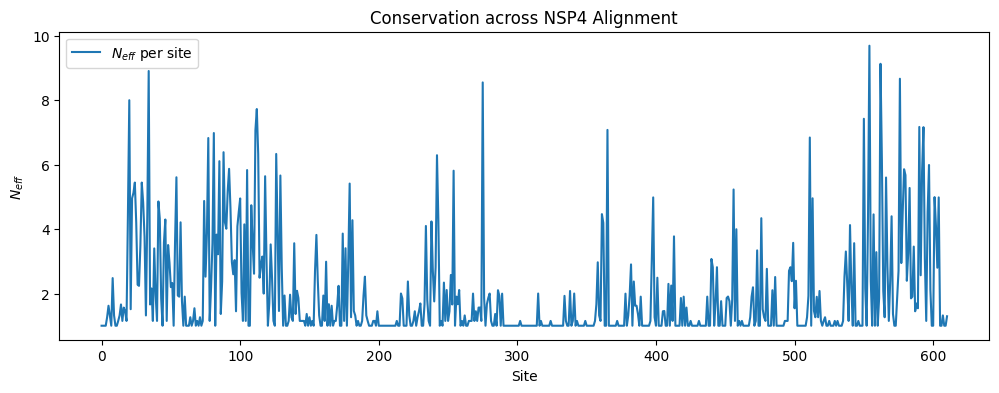

In [23]:
## calculate the entropy and neff
entropies = nsp4_mtx_annot_sites.apply(calculate_entropy).values
neff_values = neff(entropies)


# plot
plt.figure(figsize=(12, 4))
plt.title('Conservation across NSP4 Alignment')
plt.plot(neff_values, label='$N_{eff}$ per site')
plt.xlabel('Site')
plt.ylabel('$N_{eff}$')
plt.legend()
#plt.ylim(0, 20)
#plt.savefig('data/alphavirus/neff_conservation_nsp4_extended_togavirus.png')
plt.show()

## Blasting ONNV nsp agaisnt U-RVDV.v26

In [25]:
#blastp -db ../picornavirus_2C_protein/data/blastDBs/U-RVDBv26_prot/U-RVDBv26 -query data/alphavirus/nsP4_ONNV.fasta -outfmt 6 -max_target_seqs 50000 -out data/alphavirus/res_blast_nsp_ONNV_x_U-RVDBv26_50000.txt

In [88]:
blast_df = pd.read_table('data/alphavirus/res_blast_nsp4_ONNV_x_U-RVDBv26_50000.txt', sep='\t', header=None)

header = ["QueryID", "SubjectID", "Identity(%)", "Length", "Mismatch", "GapOpen", "QueryStart", "QueryEnd", "SubjectStart", "SubjectEnd", "E-value", "BitScore"]
blast_df.columns = header
blast_df['SubjectID'] = [x.split('|')[2] for x in blast_df['SubjectID'].values]

blast_df = blast_df.query('`Identity(%)` > 50').sort_values('Identity(%)', ascending=False)
blast_df = blast_df.query('Length > 550') # only allow subject sequences that cover 90% of my query sequence
blast_df

,QueryID,SubjectID,Identity(%),Length,Mismatch,GapOpen,QueryStart,QueryEnd,SubjectStart,SubjectEnd,E-value,BitScore
0,pdb|7Y38|X,AAC97206.1,98.691,611,8,0,1,611,1903,2513,0.0,1257.0
1,pdb|7Y38|X,AOS52785.1,98.363,611,10,0,1,611,1904,2514,0.0,1255.0
2,pdb|7Y38|X,AAC97204.1,98.200,611,11,0,1,611,1903,2513,0.0,1254.0
4,pdb|7Y38|X,NP_041254.1,98.200,611,11,0,1,611,1904,2514,0.0,1253.0
3,pdb|7Y38|X,AVN98161.1,98.036,611,12,0,1,611,1903,2513,0.0,1253.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1952,pdb|7Y38|X,UIE35576.1,55.250,619,254,6,1,607,1955,2562,0.0,673.0
1951,pdb|7Y38|X,UIE35608.1,55.250,619,254,6,1,607,1955,2562,0.0,673.0
1949,pdb|7Y38|X,AGT42224.1,55.250,619,254,6,1,607,1979,2586,0.0,675.0
1960,pdb|7Y38|X,AYV91725.1,55.089,619,255,6,1,607,1978,2585,0.0,668.0


In [76]:
# with open('ids_from_blast_nsp4_ONNV.txt', 'w') as file:
#     for i in blast_df['SubjectID'].values:
#         ID = i.split('|')[2]
#         file.write(f"{ID}\n")

In [33]:
## filter the sequences from the database
#seqkit grep -r -f ids_from_blast_nsp4_ONNV.txt -j 64 ../picornavirus_2C_protein/data/U-RVDB/U-RVDBv26.0-prot.fasta > data/alphavirus/res_blast_ONNV_nsp_x_U-RVDBv26_10000.fasta
#seqkit grep -r -f ids_from_blast_nsp4_ONNV.txt -j 64 ../picornavirus_2C_protein/data/U-RVDB/U-RVDBv26.0-prot_rmdup2.fasta > data/alphavirus/res_blast_ONNV_nsp4_x_U-RVDBv26_50000.fasta

In [78]:
# with open('data/alphavirus/res_blast_ONNV_nsp4_x_U-RVDBv26_50000_annotation.txt', 'w') as file:
#     file.write(f"AccessionNumber\tProteinID\tproteinName\tOrganism\tSequence\n")
#     for rec in SeqIO.parse('data/alphavirus/res_blast_ONNV_nsp4_x_U-RVDBv26_50000.fasta', 'fasta'):
#         id1 = rec.description.split('|')[2]
#         id2 = rec.description.split('|')[4]
#         desc = rec.description.split('|')[5]
#         protein_name = desc.split('[')[0]
#         organism = desc.split('[')[-1].rstrip(']')
      
#         file.write(f'{id1}\t{id2}\t{protein_name}\t{organism}\t{str(rec.seq)}\n')

In [89]:
meta_data = pd.read_csv('data/alphavirus/res_blast_ONNV_nsp4_x_U-RVDBv26_50000_annotation.txt', sep='\t')
df = blast_df.merge(meta_data, how='inner', left_on='SubjectID', right_on='AccessionNumber')
df = df[df['SubjectEnd'] - df['SubjectStart'] > 600]
df

,QueryID,SubjectID,Identity(%),Length,Mismatch,GapOpen,QueryStart,QueryEnd,SubjectStart,SubjectEnd,E-value,BitScore,AccessionNumber,ProteinID,proteinName,Organism,Sequence
0,pdb|7Y38|X,AAC97206.1,98.691,611,8,0,1,611,1903,2513,0.0,1257.0,AAC97206.1,AF079457,nonstructural polyprotein,Igbo Ora virus,MDSVYVDIDADSAFLKALQRAYPMFEVEPKQVTPNDHANARAFSHL...
1,pdb|7Y38|X,AOS52785.1,98.363,611,10,0,1,611,1904,2514,0.0,1255.0,AOS52785.1,KX771232,polyprotein,Onyong-nyong virus,MDSVYVDIDADSAFLKALQRAYPMFEVEPKQVTPNDHANARAFSHL...
2,pdb|7Y38|X,AAC97204.1,98.200,611,11,0,1,611,1903,2513,0.0,1254.0,AAC97204.1,AF079456,nonstructural polyprotein,Onyong-nyong virus,MDSVYVDIDADSAFLKALQRAYPMFEVEPKQVTPNDHANARAFSHL...
3,pdb|7Y38|X,NP_041254.1,98.200,611,11,0,1,611,1904,2514,0.0,1253.0,NP_041254.1,NC_001512,hypothetical protein,Onyong-nyong virus,MDSVYVDIDADSAFLKALQQAYPMFEVEPKQVTPNDHANARAFSHL...
4,pdb|7Y38|X,AVN98161.1,98.036,611,12,0,1,611,1903,2513,0.0,1253.0,AVN98161.1,MF409176,non-structural polyprotein,Igbo Ora virus,MDSVYVDIDADSAFLKALQRAYPMFEVEPKQVTPNDHANARAFSHL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,pdb|7Y38|X,UIE35576.1,55.250,619,254,6,1,607,1955,2562,0.0,673.0,UIE35576.1,OL754511,non-structural polyprotein,Salmon pancreas disease virus,TAFPGFEVVASNRSSNDHAAARAFSHLATKWIERDIDGRQVIVADI...
1921,pdb|7Y38|X,UIE35608.1,55.250,619,254,6,1,607,1955,2562,0.0,673.0,UIE35608.1,OL754527,non-structural polyprotein,Salmon pancreas disease virus,TAFPGFEVVASNRSSNDHAAARAFSHLATKWIERDIDGRQVIVADI...
1922,pdb|7Y38|X,AGT42224.1,55.250,619,254,6,1,607,1979,2586,0.0,675.0,AGT42224.1,KC122918,non-structural protein,Salmonid alphavirus subtype 3,MMQNLTANPSAGTTVTVDLPADHPALNQFQTAFPGFEVVASNRSSN...
1923,pdb|7Y38|X,AYV91725.1,55.089,619,255,6,1,607,1978,2585,0.0,668.0,AYV91725.1,MH238448,non-structural protein,Salmon pancreas disease virus,TAFPGFEVVASNRSSNDHAAARAFSHLATKWIERDIDGRQVVVADI...


In [90]:
for index, row in df.iterrows():
    df.loc[index, 'Sequence'] = row['Sequence'][row['SubjectStart']-1:row['SubjectEnd']]

df = df[~df['Sequence'].str.contains('X')].copy()
df.drop_duplicates('Sequence', inplace=True)
df

,QueryID,SubjectID,Identity(%),Length,Mismatch,GapOpen,QueryStart,QueryEnd,SubjectStart,SubjectEnd,E-value,BitScore,AccessionNumber,ProteinID,proteinName,Organism,Sequence
0,pdb|7Y38|X,AAC97206.1,98.691,611,8,0,1,611,1903,2513,0.0,1257.0,AAC97206.1,AF079457,nonstructural polyprotein,Igbo Ora virus,YIFSSDTGQGHLQQKSVRQTTLPVNIVEEVHEEKCYPPKLDETKEQ...
1,pdb|7Y38|X,AOS52785.1,98.363,611,10,0,1,611,1904,2514,0.0,1255.0,AOS52785.1,KX771232,polyprotein,Onyong-nyong virus,YIFSSDTGQGHLQQKSVRQTTLPVNIVEEVHEEKCYPPKLDEIKEQ...
2,pdb|7Y38|X,AAC97204.1,98.200,611,11,0,1,611,1903,2513,0.0,1254.0,AAC97204.1,AF079456,nonstructural polyprotein,Onyong-nyong virus,YIFSSDTGQGHLQQKSVRQTTLPVNIVEEVHEEKCYPPKLDEIKEQ...
3,pdb|7Y38|X,NP_041254.1,98.200,611,11,0,1,611,1904,2514,0.0,1253.0,NP_041254.1,NC_001512,hypothetical protein,Onyong-nyong virus,YIFSSDTGQGHLQQKSVRQTTLPVNIVEEVHEEKCYPPKLDEIKEQ...
4,pdb|7Y38|X,AVN98161.1,98.036,611,12,0,1,611,1903,2513,0.0,1253.0,AVN98161.1,MF409176,non-structural polyprotein,Igbo Ora virus,YIFSSDTGQGHLQQKSVRQTTLPVNIAEEVHEEKCYPPKLDEIKEQ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,pdb|7Y38|X,NP_647496.1,55.375,614,261,6,1,607,1993,2600,0.0,668.0,NP_647496.1,NC_003930,non-structural polyprotein,Salmon pancreas disease virus,YIFSSDQGTAHLSQHNTQTNNTTEVLMRTSVLPSNDHGTPDLPAET...
1918,pdb|7Y38|X,QJQ40140.1,55.250,619,254,6,1,607,1949,2556,0.0,675.0,QJQ40140.1,MN906932,non-structural polyprotein,Salmon pancreas disease virus,YIFSSDQGTAHLSQHNTQTNNTTEVLMRTSVLPSNDHGTPDLPAET...
1919,pdb|7Y38|X,QZA74868.1,55.250,619,254,6,1,607,1966,2573,0.0,673.0,QZA74868.1,MZ395645,non-structural polyprotein,Salmon pancreas disease virus,YIFSSDQGTAHLSQHNTQTNNTTEVLMRTSVLPSNDHGTPDLPAET...
1922,pdb|7Y38|X,AGT42224.1,55.250,619,254,6,1,607,1979,2586,0.0,675.0,AGT42224.1,KC122918,non-structural protein,Salmonid alphavirus subtype 3,YIFSSDQGTAHLSQHNTQTNNTTEVLMRTSVLPSNDHGTPDLPAET...


In [91]:
# with open('data/alphavirus/res_blast_ONNV_nsp4_x_U-RVDBv26_filtered.fasta', 'w') as file:
#     for index, row in df.iterrows():
#         file.write(f">{row['AccessionNumber']} | {row['ProteinID']} | {row['proteinName']} | {row['Organism']}\n")
#         file.write(f"{row['Sequence']}\n")

In [ ]:
#mafft --auto data/alphavirus/res_blast_ONNV_nsp4_x_U-RVDBv26_filtered.fasta > data/alphavirus/res_blast_ONNV_nsp4_x_U-RVDBv26_filtered_aligned.fasta

In [9]:
seq_aligment = "data/alphavirus/res_blast_ONNV_nsp4_x_U-RVDBv26_filtered_aligned.fasta"

alignment = AlignIO.read(seq_aligment, "fasta")

# create a dictionary with the sequences, to create a data frame
dict_align = {} 
for record in alignment:
    # removing / added during alignment
    dict_align[record.id.split('/')[0]] = list(record.seq)

# create a data frame with the sequences aligned
nsp4_mtx_annot_sites= pd.DataFrame.from_dict(dict_align, orient='index')
#nsp4_mtx_annot_sites = nsp4_mtx_annot_sites.iloc[:, 2154-1:2764].copy()
nsp4_mtx_annot_sites

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,...,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614
AAC97206.1,Y,I,F,S,S,D,T,G,Q,G,H,L,Q,Q,K,S,V,R,Q,T,T,L,P,V,N,I,V,E,E,V,H,E,E,K,C,Y,P,P,K,L,D,E,T,K,E,Q,L,L,L,K,R,L,Q,E,S,...,W,Q,R,T,G,L,V,T,E,L,E,K,A,V,Y,S,R,Y,E,V,Q,G,I,T,A,V,I,T,S,M,A,T,F,A,S,S,K,E,N,F,K,K,L,R,G,P,V,V,T,L,Y,G,G,P,K
AOS52785.1,Y,I,F,S,S,D,T,G,Q,G,H,L,Q,Q,K,S,V,R,Q,T,T,L,P,V,N,I,V,E,E,V,H,E,E,K,C,Y,P,P,K,L,D,E,I,K,E,Q,L,L,L,K,R,L,Q,E,S,...,W,Q,R,T,G,L,V,T,E,L,E,K,A,V,Y,S,R,Y,E,V,Q,G,I,T,A,V,I,T,S,M,A,T,F,A,N,S,K,E,N,F,K,K,L,R,G,P,V,V,T,L,Y,G,G,P,K
AAC97204.1,Y,I,F,S,S,D,T,G,Q,G,H,L,Q,Q,K,S,V,R,Q,T,T,L,P,V,N,I,V,E,E,V,H,E,E,K,C,Y,P,P,K,L,D,E,I,K,E,Q,L,L,L,K,R,L,Q,E,S,...,W,Q,R,T,G,L,I,T,E,L,E,K,A,V,Y,S,R,Y,E,V,Q,G,I,T,A,V,I,T,S,M,A,T,F,A,S,S,K,E,N,F,K,K,L,R,G,P,V,V,T,L,Y,G,G,P,K
NP_041254.1,Y,I,F,S,S,D,T,G,Q,G,H,L,Q,Q,K,S,V,R,Q,T,T,L,P,V,N,I,V,E,E,V,H,E,E,K,C,Y,P,P,K,L,D,E,I,K,E,Q,L,L,L,K,R,L,Q,E,S,...,W,Q,R,T,G,L,V,T,E,L,E,K,A,V,Y,S,R,Y,E,V,Q,G,I,T,A,V,I,T,S,M,A,T,F,A,N,S,K,E,N,F,K,K,L,R,G,P,V,V,T,L,Y,G,G,P,K
AVN98161.1,Y,I,F,S,S,D,T,G,Q,G,H,L,Q,Q,K,S,V,R,Q,T,T,L,P,V,N,I,A,E,E,V,H,E,E,K,C,Y,P,P,K,L,D,E,I,K,E,Q,L,L,L,K,R,L,Q,E,S,...,W,Q,R,T,G,L,I,T,E,L,E,K,A,V,Y,S,R,Y,E,V,Q,G,I,T,A,V,I,T,S,M,A,T,F,A,S,S,K,E,N,F,K,K,L,R,G,P,V,V,T,L,Y,G,G,P,K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NP_647496.1,Y,I,F,S,S,D,Q,G,T,A,H,L,S,Q,H,N,T,Q,T,N,N,T,T,E,V,L,M,R,T,S,V,L,P,S,N,D,H,G,T,P,D,L,P,A,E,T,R,K,R,L,A,Y,Q,M,R,...,W,Y,R,V,G,I,Q,W,P,L,Q,V,A,A,A,T,R,Y,G,V,N,H,L,P,L,A,T,M,A,M,A,T,L,A,Q,D,L,R,S,Y,L,G,A,R,G,E,Y,V,S,L,Y,-,-,-,-
QJQ40140.1,Y,I,F,S,S,D,Q,G,T,A,H,L,S,Q,H,N,T,Q,T,N,N,T,T,E,V,L,M,R,T,S,V,L,P,S,N,D,H,G,T,P,D,L,P,A,E,T,K,K,K,L,A,Y,Q,M,R,...,W,Y,R,V,G,I,Q,W,P,L,Q,V,A,V,A,T,R,Y,G,V,N,H,L,P,L,A,T,M,A,M,A,T,L,A,Q,D,L,R,S,Y,L,G,A,R,G,E,Y,V,S,L,Y,-,-,-,-
QZA74868.1,Y,I,F,S,S,D,Q,G,T,A,H,L,S,Q,H,N,T,Q,T,N,N,T,T,E,V,L,M,R,T,S,V,L,P,S,N,D,H,G,T,P,D,L,P,A,E,T,K,K,R,L,A,Y,Q,M,R,...,W,Y,R,V,G,I,Q,W,P,L,Q,V,A,A,A,T,R,Y,G,V,N,H,L,P,L,A,T,M,A,M,A,T,L,A,Q,D,L,R,S,Y,L,G,A,R,G,E,Y,V,S,L,Y,-,-,-,-
AGT42224.1,Y,I,F,S,S,D,Q,G,T,A,H,L,S,Q,H,N,T,Q,T,N,N,T,T,E,V,L,M,R,T,S,V,L,P,S,N,D,H,G,T,P,D,L,P,A,E,T,K,K,K,L,A,Y,Q,M,R,...,W,Y,R,V,G,I,Q,W,P,L,Q,V,A,V,A,T,R,Y,G,V,N,H,L,P,L,A,T,M,A,M,A,T,L,A,Q,D,L,R,S,Y,L,G,A,R,G,E,Y,V,S,L,Y,-,-,-,-


In [10]:
for idx, value in nsp4_mtx_annot_sites.loc['AAC97204.1', :].items():
    if value == '-':
        print(idx, value)

93 -
234 -
238 -
280 -


In [11]:
nsp4_mtx_annot_sites.drop([93,234,238,280], axis=1, inplace=True)

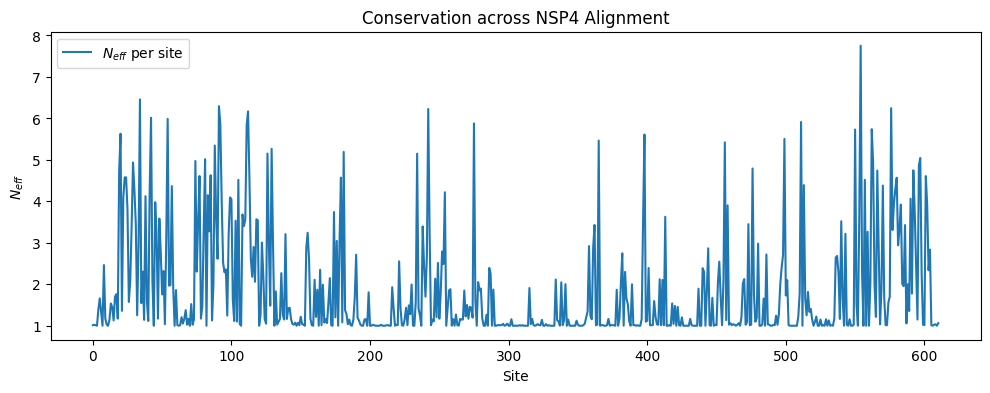

In [13]:
entropies = nsp4_mtx_annot_sites.apply(calculate_entropy).values
neff_values_urvdb = neff(entropies)

plt.figure(figsize=(12, 4))
plt.title('Conservation across NSP4 Alignment')
plt.plot(neff_values_urvdb, label='$N_{eff}$ per site')
plt.xlabel('Site')
plt.ylabel('$N_{eff}$')
plt.legend()
#plt.savefig('data/alphavirus/neff_conservation_nsp4_urvdb.png')
plt.show()

## Togavirus x U-RVDB

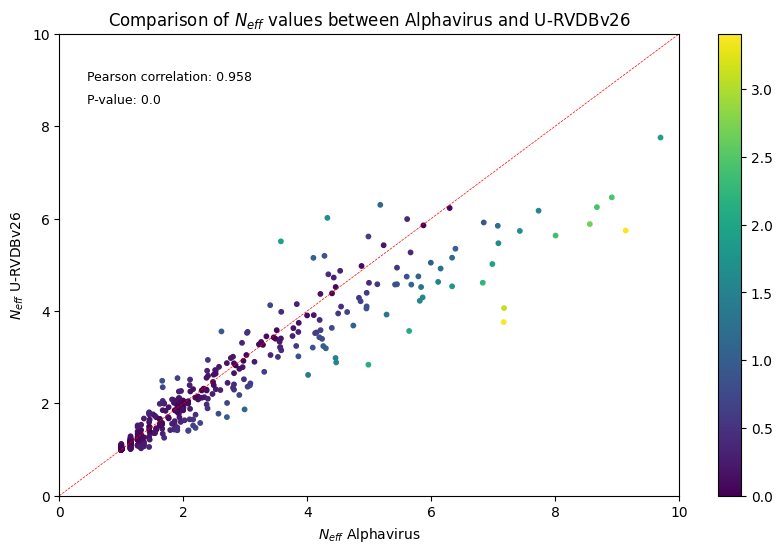

In [24]:
from scipy import stats

color = abs(neff_values - neff_values_urvdb)
corr_ab, p_value = stats.pearsonr(neff_values, neff_values_urvdb)

plt.figure(figsize=(10, 6))
plt.title('Comparison of $N_{eff}$ values between Alphavirus and U-RVDBv26')
plt.scatter(neff_values, neff_values_urvdb, s=10, c=color)
plt.plot([0, 20], [0, 20], color='red', linestyle='--', linewidth=0.5)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('$N_{eff}$ Alphavirus')
plt.ylabel('$N_{eff}$ U-RVDBv26')
plt.text(0.45, 9, f'Pearson correlation: {corr_ab:.3f}', fontsize=9)
plt.text(0.45, 8.5, f'P-value: {p_value:.3}', fontsize=9)


plt.colorbar()
plt.savefig('results/alphavirus_vs_urvdbv26_neff_v02.png')
plt.show()

# Alignment using neff from merged alpha + RVDB

In [4]:
######################### those are only sequences from alphavirus plus res from RVDB ########################

seq_aligment = "data/nsP4/alphavirus_rvdb_nsp4_concat_aligned.fasta"
alignment = AlignIO.read(seq_aligment, "fasta")

# create a dictionary with the sequences, to create a data frame
dict_align = {} 
for record in alignment:
    # removing / added during alignment
    dict_align[record.id.split('/')[0]] = list(record.seq)
# create a data frame with the sequences aligned
mtx = pd.DataFrame.from_dict(dict_align, orient='index')
nsp4_mtx_annot_sites = mtx.iloc[:, 2432-1:3046].copy()
nsp4_mtx_annot_sites

,2431,2432,2433,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3026,3027,3028,3029,3030,3031,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045
QBM15857.1,Y,I,F,S,S,D,T,G,P,G,H,L,Q,Q,Q,S,V,R,Q,H,D,L,P,L,P,T,W,E,R,K,L,P,E,I,F,H,P,P,R,F,N,A,A,K,E,E,L,L,R,H,R,M,Q,M,A,...,W,N,R,V,G,I,R,E,Q,L,K,K,S,L,F,S,R,Y,G,V,Q,F,T,D,L,V,L,D,G,L,S,C,L,S,K,S,I,K,N,F,N,H,L,R,G,T,L,R,H,L,Y,V,-,-,-
AAD14566.1,Y,I,F,S,S,D,T,G,Q,G,H,L,Q,Q,K,S,V,R,Q,T,V,L,S,E,V,V,L,E,R,T,L,L,D,D,V,Y,A,P,R,L,D,L,N,K,E,E,L,L,R,K,K,L,Q,L,N,...,W,N,R,A,G,I,S,V,E,L,C,K,A,V,E,S,R,Y,E,I,V,G,T,S,I,I,I,A,A,M,A,T,L,A,R,N,V,A,T,F,K,H,L,R,G,N,P,I,H,L,Y,G,-,-,-
AAN05101.1,Y,I,F,S,S,D,T,G,P,G,H,L,Q,Q,K,S,V,R,Q,S,V,L,P,V,N,T,L,E,E,V,H,E,E,K,C,Y,P,P,K,L,D,E,A,K,E,Q,L,L,L,K,K,L,Q,E,S,...,W,Q,R,T,G,L,I,D,E,L,E,K,A,V,Y,S,R,Y,E,V,Q,G,I,S,V,V,V,M,S,M,A,T,F,A,S,S,R,S,N,F,E,K,L,R,G,P,V,V,T,L,Y,G,G,P,K
AJD20059.2,Y,I,F,S,S,D,T,G,P,G,H,L,Q,Q,K,S,V,R,Q,S,V,L,P,V,N,T,L,E,E,V,H,E,E,K,C,Y,P,P,K,L,D,E,A,K,E,Q,L,L,L,K,K,L,Q,E,S,...,W,Q,R,T,G,L,I,D,E,L,E,K,A,V,Y,S,R,Y,E,V,Q,G,I,S,V,V,V,M,S,M,A,T,F,A,S,S,R,S,N,F,E,K,L,R,G,P,V,I,T,L,Y,G,G,P,K
AAD14550.1,Y,I,F,S,S,D,T,G,Q,G,H,L,Q,Q,K,S,V,R,Q,T,V,L,S,E,V,V,L,E,R,T,E,L,E,I,S,Y,A,P,R,L,D,L,E,K,E,E,L,L,R,K,K,L,Q,L,N,...,W,N,R,V,G,I,L,P,E,L,C,K,A,V,E,S,R,Y,E,T,V,G,T,S,V,I,V,M,A,M,A,T,L,A,S,S,V,K,S,F,S,Y,L,R,G,A,S,I,T,L,Y,G,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NP_647496.1,Y,I,F,S,S,D,Q,G,T,A,H,L,S,Q,H,N,T,Q,T,N,N,T,T,E,V,L,M,R,T,S,V,L,P,S,N,D,H,G,T,P,D,L,P,A,E,T,R,K,R,L,A,Y,Q,M,R,...,W,Y,R,V,G,I,Q,W,P,L,Q,V,A,A,A,T,R,Y,G,V,N,H,L,P,L,A,T,M,A,M,A,T,L,A,Q,D,L,R,S,Y,L,G,A,R,G,E,Y,V,S,L,Y,-,-,-,-
QJQ40140.1,Y,I,F,S,S,D,Q,G,T,A,H,L,S,Q,H,N,T,Q,T,N,N,T,T,E,V,L,M,R,T,S,V,L,P,S,N,D,H,G,T,P,D,L,P,A,E,T,K,K,K,L,A,Y,Q,M,R,...,W,Y,R,V,G,I,Q,W,P,L,Q,V,A,V,A,T,R,Y,G,V,N,H,L,P,L,A,T,M,A,M,A,T,L,A,Q,D,L,R,S,Y,L,G,A,R,G,E,Y,V,S,L,Y,-,-,-,-
QZA74868.1,Y,I,F,S,S,D,Q,G,T,A,H,L,S,Q,H,N,T,Q,T,N,N,T,T,E,V,L,M,R,T,S,V,L,P,S,N,D,H,G,T,P,D,L,P,A,E,T,K,K,R,L,A,Y,Q,M,R,...,W,Y,R,V,G,I,Q,W,P,L,Q,V,A,A,A,T,R,Y,G,V,N,H,L,P,L,A,T,M,A,M,A,T,L,A,Q,D,L,R,S,Y,L,G,A,R,G,E,Y,V,S,L,Y,-,-,-,-
AGT42224.1,Y,I,F,S,S,D,Q,G,T,A,H,L,S,Q,H,N,T,Q,T,N,N,T,T,E,V,L,M,R,T,S,V,L,P,S,N,D,H,G,T,P,D,L,P,A,E,T,K,K,K,L,A,Y,Q,M,R,...,W,Y,R,V,G,I,Q,W,P,L,Q,V,A,V,A,T,R,Y,G,V,N,H,L,P,L,A,T,M,A,M,A,T,L,A,Q,D,L,R,S,Y,L,G,A,R,G,E,Y,V,S,L,Y,-,-,-,-


In [5]:
for idx, value in nsp4_mtx_annot_sites.loc['AAN05101.1', :].items():
    if value == '-':
        print(idx, value)

2524 -
2665 -
2669 -
2711 -


In [6]:
nsp4_mtx_annot_sites.drop([2524, 2665, 2669, 2711], axis=1, inplace=True)

for idx, value in nsp4_mtx_annot_sites.loc['AAN05101.1', :].items():
    if value == '-':
        print(idx, value)

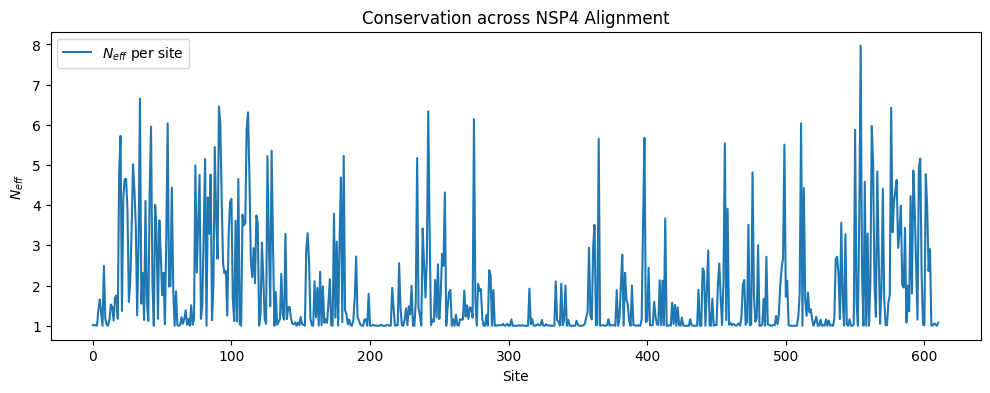

In [7]:
## calculate the entropy and neff
entropies = nsp4_mtx_annot_sites.apply(calculate_entropy).values
neff_values = neff(entropies)


# plot
plt.figure(figsize=(12, 4))
plt.title('Conservation across NSP4 Alignment')
plt.plot(neff_values, label='$N_{eff}$ per site')
plt.xlabel('Site')
plt.ylabel('$N_{eff}$')
plt.legend()
#plt.ylim(0, 20)
#plt.savefig('data/alphavirus/neff_conservation_nsp4_extended_togavirus.png')
plt.show()

In [98]:
# those are the 32 ref virus, I will use only them for the plot
# idx_voi = [
#     'QBM15857.1', 'AAD14566.1', 'AAN05101.1', 'AJD20059.2', 'AAD14550.1',
#     'ACT68008.1', 'AAU85259.1', 'ABK32031.1', 'ACO59901.1', 'AHL83800.1',
#     'ABL84688.1', 'AAL79763.1', 'AIM46755.1', 'ABP73665.1', 'AAD14562.1',
#     'AAD14554.1', 'AAC97204.1', 'AAC97206.1', 'AAD14560.1', 'AAD14564.1',
#     'ACV66991.1', 'AAA96329.1', 'CAC87660.1', 'CAA27741.1', 'AAA96972.1',
#     'AAC83378.1', 'AAD14556.1', 'AAK66989.1', 'AAB04682.2', 'AAD14558.1',
#     'ACT75287.1', 'AAF28339.1']


idx_voi = [
    'QBM15857.1', 'AAD14566.1', 'AAN05101.1', 'AJD20059.2', 'AAD14550.1',
    'ACT68008.1', 'AAU85259.1', 'ABK32031.1', 'ACO59901.1', 'AHL83800.1',
    'AAL79763.1', 'AIM46755.1', 'AAD14562.1', 'AAD14554.1', 'AAC97204.1', 
    'AAD14560.1', 'AAD14564.1', 'ACV66991.1', 'AAA96329.1', 'CAC87660.1', 
    'CAA27741.1', 'AAA96972.1', 'AAC83378.1', 
    #'AAD14556.1', 'AAK66989.1',
    'ACT75287.1', 'AAF28339.1']

nsp4_mtx_annot_sites = nsp4_mtx_annot_sites.loc[idx_voi, :]
nsp4_mtx_annot_sites.shape

(25, 611)

In [95]:
'AAD14559.1' in idx_voi

False

In [99]:
# converting annotation to numerical values with the Neff values
nsp4_mtx_val = nsp4_mtx_annot_sites.copy()
for i, col in enumerate(nsp4_mtx_val.columns):
    nsp4_mtx_val[col] = neff_values[i]

nsp4_mtx_val.shape

(25, 611)

In [100]:
## rename the virus name to a readble format
df = data[[ 'Family', 'Genus', 'Species',
       'Exemplar or additional isolate', 'Virus name(s)',
       'Virus name abbreviation(s)', 'Virus GENBANK accession', 'Virus REFSEQ accession',]]

meta_data = df.merge(pd.read_csv('data/alphavirus_proteins_annotation.txt', sep='\t'), left_on='Virus GENBANK accession', right_on='AccessionNumber')
meta_data['virus_label'] = [x.split(';')[-1] + '-' + str(y) for x, y in  zip(meta_data['Virus name abbreviation(s)'].values, meta_data['Exemplar or additional isolate'].values)]
meta_data

,Family,Genus,Species,Exemplar or additional isolate,Virus name(s),Virus name abbreviation(s),Virus GENBANK accession,Virus REFSEQ accession,AccessionNumber,ProteinID,ProteinName,Organism,Description,Sequence,virus_label
0,Togaviridae,Alphavirus,Aura virus,E,Aura virus,AURAV,AF126284,NC_003900,AF126284,AAD13622.2,polyprotein 1,Aura virus,contains leaky opal termination codon,MEKPTVHVDVDPQSPFVLQLQKSFPQFEIVAQQVTPNDHANARAFS...,AURAV-E
1,Togaviridae,Alphavirus,Aura virus,E,Aura virus,AURAV,AF126284,NC_003900,AF126284,AAD13623.1,polyprotein 2,Aura virus,NaN,MNSVFYNPFGRGAYAQPPIAWRPRRRAAPAPRPSGLTTQIQQLTRA...,AURAV-E
2,Togaviridae,Alphavirus,Barmah Forest virus,E,Barmah Forest virus,BFV,U73745,NC_001786,U73745,AAB40701.1,nonstructural polyprotein,Barmah Forest virus,NaN,MAKPVVKIDVEPESHFAKQVQSCFPQFEIEAVQTTPNDHAHARAFS...,BFV-E
3,Togaviridae,Alphavirus,Barmah Forest virus,E,Barmah Forest virus,BFV,U73745,NC_001786,U73745,AAB40702.1,structural polyprotein,Barmah Forest virus,NaN,MDFIPTQTFYGRRWRPAPVQRYIPQPQPPAPPRRRRGPSQLQQLVA...,BFV-E
4,Togaviridae,Alphavirus,Bebaru virus,E,bebaru virus,BEBV,HM147985,NC_016962,HM147985,AEJ36224.1,non structural polyprotein,Bebaru virus,NaN,MNKVHVDIDEESPFLKSLQRAFPSLEIEAKQVTANDHACARAFSHL...,BEBV-E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Togaviridae,Alphavirus,Western equine encephalitis virus,E,western equine encephalitis virus; western equ...,WEEV; WEEV-SA,GQ287646,NC_075015,GQ287646,ACT75288.1,structural polyprotein,Western equine encephalitis virus,"encodes nucleocapsid, E3, E2, 6K and E1 proteins",MFPYPQLNFPPVYPTNPMAYRDPNPPRRRWRPFRPPLAAQIEDLRR...,WEEV-SA-E
102,Togaviridae,Alphavirus,Western equine encephalitis virus,A,western equine encephalitis virus; western equ...,WEEV; WEEV-NA,AF214040,NC_003908,AF214040,AAF28339.1,nonstructural polyprotein,Western equine encephalitis virus,"encodes nsP1, nsP2, nsP3 and nsP4 proteins",MERIHVDLDADSPYVKSLQRTFPQFEIEARQVTDNDHANARAFSHV...,WEEV-NA-A
103,Togaviridae,Alphavirus,Western equine encephalitis virus,A,western equine encephalitis virus; western equ...,WEEV; WEEV-NA,AF214040,NC_003908,AF214040,AAF28340.1,structural polyprotein,Western equine encephalitis virus,"encodes nucleocapsid, E3, E2, 6K and E1 proteins",MFPYPQLNFPPVYPTNPMAYRDPNPPRRRWRPFRPPLAAQIEDLRR...,WEEV-NA-A
104,Togaviridae,Alphavirus,Whataroa virus,E,Whataroa virus,WHATV,HM147993,NC_016961,HM147993,AEJ36238.1,non structural polyprotein,Whataroa virus,NaN,MEKPVVNVDVDPQSPFVAQLQKSFPQFEVVAQQATPNDHANARAFS...,WHATV-E


In [50]:
#meta_data.to_excel('data/Alphavirus_ref_data.xlsx', index=False)

In [101]:
# retrieve virus names from meta meta_data, and sorting them in the same order as they appear in the matrix
df = meta_data[meta_data['ProteinID'].isin(list(nsp4_mtx_annot_sites.index.values))][['ProteinID','virus_label', 'Species']]

# Convert the column to a categorical type with the specified order
df['ProteinID'] = pd.Categorical(df['ProteinID'], categories=list(nsp4_mtx_annot_sites.index.values), ordered=True)
df = df.sort_values('ProteinID')

y_labels = list(df['virus_label'].values)
y_labels = [x.split(';')[-1].strip() for x in y_labels]
y_label_idx = [x+0.5 for x in range(len(y_labels))]

In [102]:
pal = sns.color_palette("mako_r",  21)
custom_palette = sns.color_palette(["white"] + pal)
custom_palette

[(1.0, 1.0, 1.0),
 (0.78462009, 0.92466151, 0.82514119),
 (0.68051833, 0.88963189, 0.75150483),
 (0.56798832, 0.85987893, 0.70468261),
 (0.4285828, 0.82635051, 0.6780564),
 (0.3206671, 0.78233575, 0.67786729),
 (0.26604085, 0.73564353, 0.67914062),
 (0.22901625, 0.6834332, 0.67659251),
 (0.20968223, 0.63088252, 0.6701105),
 (0.20384884, 0.58264293, 0.6612145),
 (0.20418396, 0.53013715, 0.64946117),
 (0.20722876, 0.47763224, 0.63711608),
 (0.21112526, 0.42903064, 0.6266318),
 (0.22152555, 0.37424409, 0.61304472),
 (0.23807973, 0.32226344, 0.58941872),
 (0.25296722, 0.2685428, 0.53503572),
 (0.25007383, 0.22365053, 0.45519562),
 (0.2350092, 0.18704459, 0.3781528),
 (0.20976258, 0.14925954, 0.29687795),
 (0.17566717, 0.11378321, 0.21857219),
 (0.13701138, 0.08259683, 0.15060265),
 (0.09009161, 0.04664706, 0.08105568)]

In [13]:
nsp4 = 'YIFSSDTGPGHLQQKSVRQSVLPVNTLEEVHEEKCYPPKLDEAKEQLLLKKLQESASMANRSRYQSRKVENMKATIIQRLKRGCRLYLMSETPKVPTYRTTYPAPVYSPPINVRLSNPESAVAACNEFLARNYPTVSSYQITDEYDAYLDMVDGSESCLDRATFNPSKLRSYPKQHAYHAPSIRSAVPSPFQNTLQNVLAAATKRNCNVTQMRELPTLDSAVFNVECFKKFACNQEYWEEFAASPIRITTENLTTYVTKLKGPKAAALFAKTHNLLPLQEVPMDRFTVDMKRDVKVTPGTKHTEERPKVQVIQAAEPLATAYLCGIHRELVRRLNAVLLPNVHTLFDMSAEDFDAIIAAHFKPGDTVLETDIASFDKSQDDSLALTALMLLEDLGVDHSLLDLIEAAFGEISSCHLPTGTRFKFGAMMKSGMFLTLFVNTLLNITIASRVLEDRLTKSACAAFIGDDNIIHGVVSDELMAARCATWMNMEVKIIDAVVSQKAPYFCGGFILHDIVTGTACRVADPLKRLFKLGKPLAAGDEQDEDRRRALADEVVRWQRTGLIDELEKAVYSRYEVQGISVVVMSMATFASSRSNFEKLRGPVVTLYGGPK'

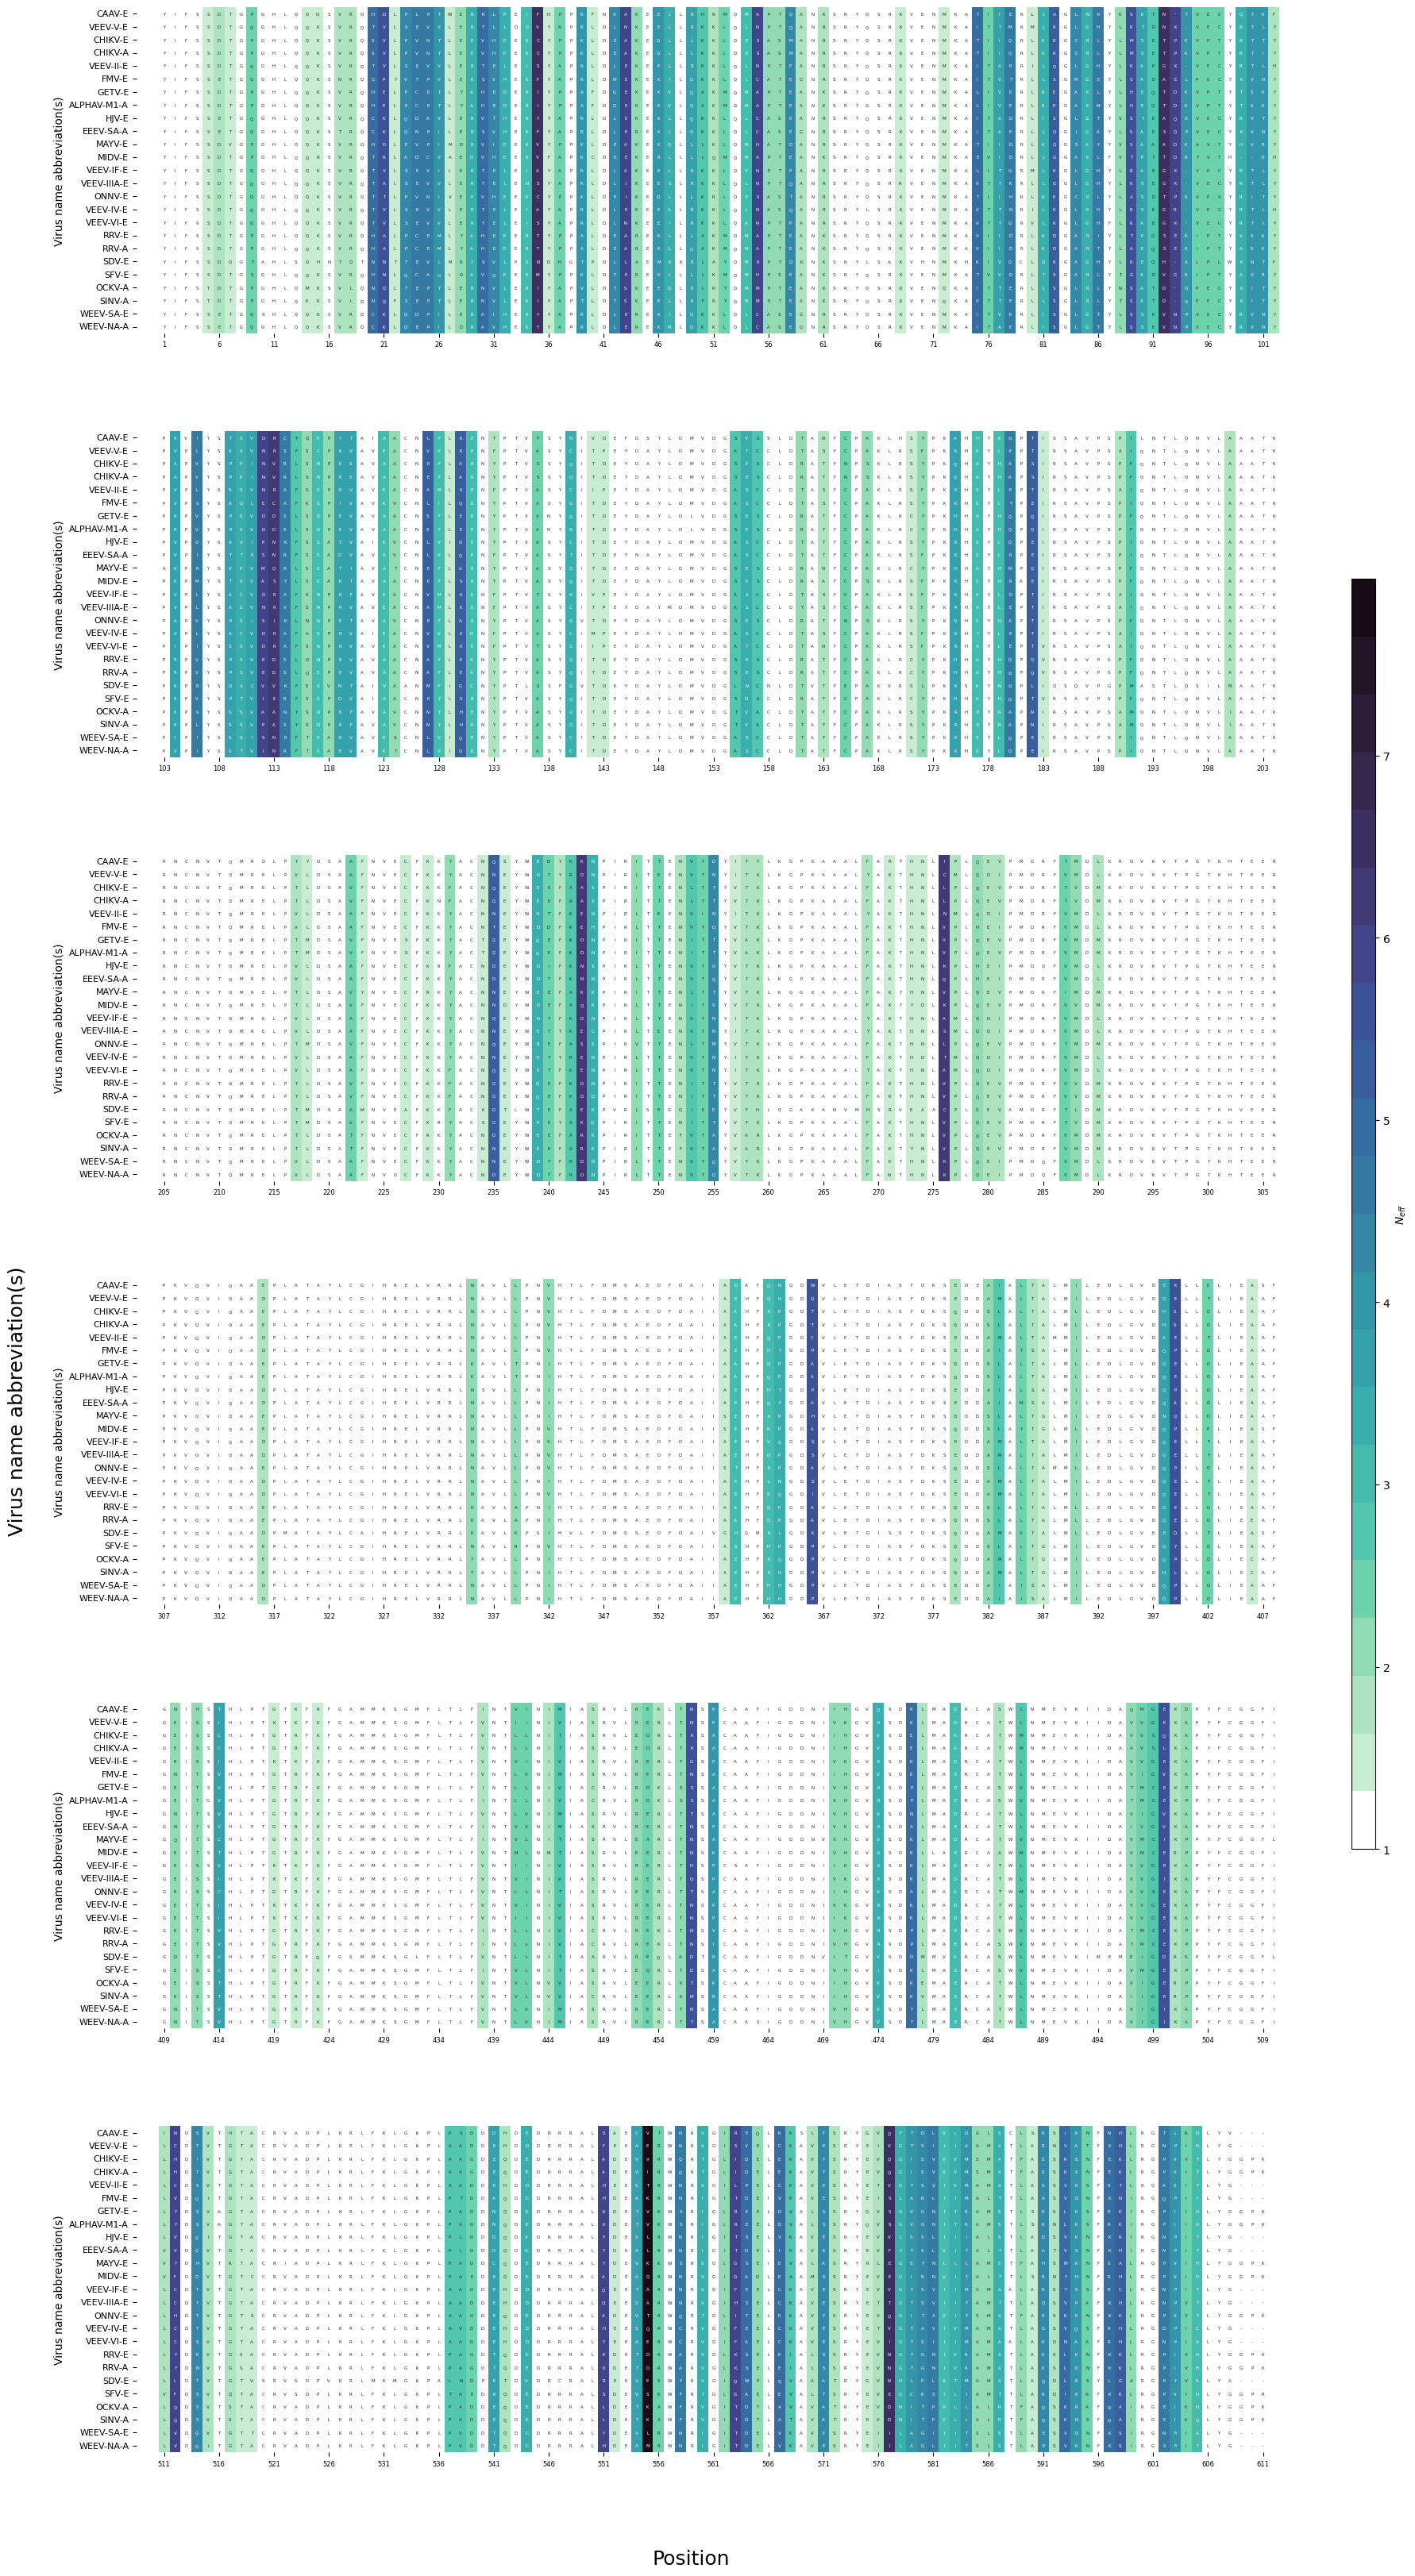

In [103]:
#fig, ax = plt.subplots(6, 1, sharex=False, sharey=True, figsize=(7, 10))
fig, ax = plt.subplots(6, 1, sharex=False, sharey=True, figsize=(20, 40))

step = 102
start = 1
stop = 611

start1 = start
start2 = start + (1*step)
start3 = start + (2*step)
start4 = start + (3*step)
start5 = start + (4*step)
start6 = start + (5*step)

stop1 = start + (1*step)-1
stop2 = start + (2*step)-1
stop3 = start + (3*step)-1
stop4 = start + (4*step)-1
stop5 = start + (5*step)-1
stop6 = stop

min_val = np.min(nsp4_mtx_val.values)
max_val = np.max(nsp4_mtx_val.values)

# rename columns of the alignemt to avoid inconsistence on the plot sizes, due the gap removed.
nsp4_mtx_annot_sites.columns = list(range(1, 612))
nsp4_mtx_val.columns = list(range(1, 612))

###############  subplot 1 ##############
sns.heatmap(
    nsp4_mtx_val.loc[:, start1:stop1], cmap=custom_palette, annot=nsp4_mtx_annot_sites.loc[:, start1:stop1], fmt='', 
    annot_kws={'size':4}, cbar=False, ax=ax[0], vmin=min_val, vmax=max_val)
locations = ax[0].get_xticks()
labels = nsp4_mtx_annot_sites.loc[:,start1:stop1].columns

ax[0].set_xticks(locations[::5], labels[::5], size=6, rotation=0)
ax[0].set_yticks(y_label_idx, y_labels, size=8, rotation=0)
ax[0].set_xlim(-2, 110)
ax[0].set_ylabel('Virus name abbreviation(s)', size=10, ha='center')


############### subplot 2 ##############
sns.heatmap(
    nsp4_mtx_val.loc[:,start2:stop2], cmap=custom_palette, annot=nsp4_mtx_annot_sites.loc[:,start2:stop2], fmt='', 
    annot_kws={'size':4}, cbar=False, ax=ax[1], vmin=min_val, vmax=max_val)
locations = ax[1].get_xticks()
labels = nsp4_mtx_annot_sites.loc[:,start2:stop2].columns
ax[1].set_xticks(locations[::5], labels[::5], size=6, rotation=0)
ax[1].set_yticks(y_label_idx, y_labels, size=8, rotation=0)
ax[1].set_xlim(-2, 110)
ax[1].set_ylabel('Virus name abbreviation(s)', size=10, ha='center')




# ############### subplot 3 ##############
sns.heatmap(
    nsp4_mtx_val.loc[:,start3:stop3], cmap=custom_palette, annot=nsp4_mtx_annot_sites.loc[:,start3:stop3], fmt='', 
    annot_kws={'size':4}, cbar=False, ax=ax[2], vmin=min_val, vmax=max_val)
locations = ax[2].get_xticks()
labels = nsp4_mtx_annot_sites.loc[:,start3:stop3].columns
ax[2].set_xticks(locations[::5], labels[::5], size=6, rotation=0)
ax[2].set_yticks(y_label_idx, y_labels, size=8, rotation=0)
ax[2].set_xlim(-2, 110)
ax[2].set_ylabel('Virus name abbreviation(s)', size=10, ha='center')



# ############### subplot 4 ##############
sns.heatmap(
    nsp4_mtx_val.loc[:,start4:stop4], cmap=custom_palette, annot=nsp4_mtx_annot_sites.loc[:,start4:stop4], fmt='', 
    annot_kws={'size':4}, cbar=False, ax=ax[3], vmin=min_val, vmax=max_val)
locations = ax[3].get_xticks()
labels = nsp4_mtx_annot_sites.loc[:,start4:stop4].columns
ax[3].set_xticks(locations[::5], labels[::5], size=6, rotation=0)
ax[3].set_yticks(y_label_idx, y_labels, size=8, rotation=0)
ax[3].set_xlim(-2, 110)
ax[3].set_ylabel('Virus name abbreviation(s)', size=10, ha='center')




# ############### subplot 5 ##############
sns.heatmap(
    nsp4_mtx_val.loc[:,start5:stop5], cmap=custom_palette, annot=nsp4_mtx_annot_sites.loc[:,start5:stop5], fmt='', 
    annot_kws={'size':4}, cbar=False, ax=ax[4], vmin=min_val, vmax=max_val)
locations = ax[4].get_xticks()
labels = nsp4_mtx_annot_sites.loc[:,start5:stop5].columns
ax[4].set_xticks(locations[::5], labels[::5], size=6, rotation=0)
ax[4].set_yticks(y_label_idx, y_labels, size=8, rotation=0)
ax[4].set_xlim(-2, 110)
ax[4].set_ylabel('Virus name abbreviation(s)', size=10, ha='center')


# ############### subplot 6 ##############
sns.heatmap(
    nsp4_mtx_val.loc[:,start6:stop6], cmap=custom_palette, annot=nsp4_mtx_annot_sites.loc[:,start6:stop6], fmt='', 
    annot_kws={'size':4}, cbar=False, ax=ax[5], vmin=min_val, vmax=max_val)
locations = ax[5].get_xticks()
labels = nsp4_mtx_annot_sites.loc[:,start6:stop6+1].columns
ax[5].set_xticks(locations[::5], labels[::5], size=6, rotation=0)
ax[5].set_yticks(y_label_idx, y_labels, size=8, rotation=0)
ax[5].set_xlim(-2, 110)
ax[5].set_ylabel('Virus name abbreviation(s)', size=10, ha='center')


# Figure text elements
#plt.suptitle('ONNV Alphavirus NSP4 Conservation - Gaps removed', size=20, y=0.91)
fig.text(0.45, 0.08, '\nPosition', size=18, va='center', rotation=0)
fig.text(0.05, 0.4, 'Virus name abbreviation(s)', size=18, ha='center', rotation=90)
cbar_ax = fig.add_axes([0.89, 0.3, 0.015, 0.4])
fig.colorbar(ax[0].collections[0], cax=cbar_ax, location="right", shrink=0.03, label='$N_{eff}$')
plt.subplots_adjust(wspace=0.5, hspace=0.3)

#plt.savefig('results/alphavirus/heatmaps_ONNV_alphavirus_extended_neff.png', dpi=600)
plt.show()

In [129]:
611/8

76.375

In [116]:
4*77

308

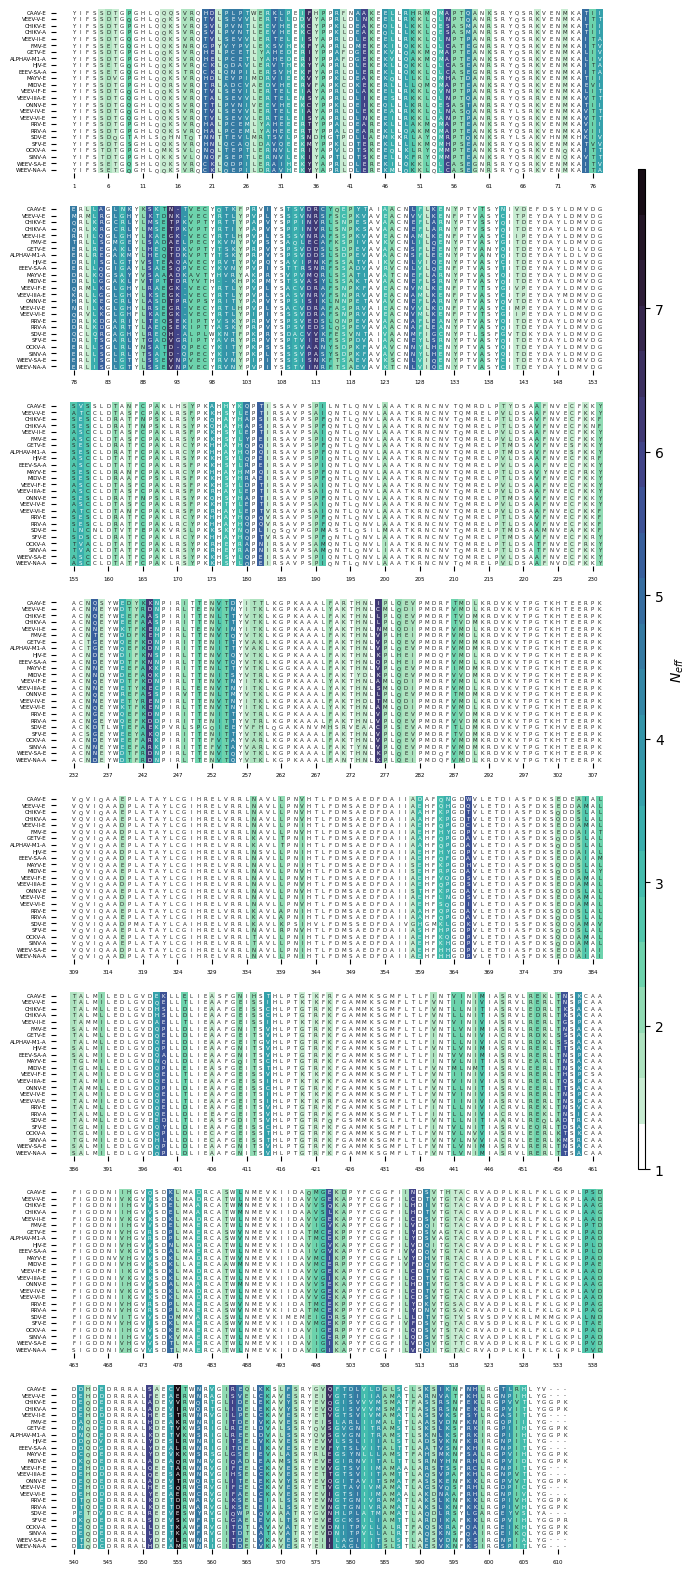

In [133]:
# Version 2
num_rows = 8
#fig, ax = plt.subplots(num_rows, 1, sharex=False, sharey=True, figsize=(7.5, 20), constrained_layout=True)
fig, ax = plt.subplots(num_rows, 1, sharex=False, sharey=True, figsize=(7.5, 20))

min_val = np.min(nsp4_mtx_val.values)
max_val = np.max(nsp4_mtx_val.values)

# rename columns of the alignemt to avoid inconsistence on the plot sizes, due the gap removed.
nsp4_mtx_annot_sites.columns = list(range(1, 612))
nsp4_mtx_val.columns = list(range(1, 612))


###############  subplots ##############
step = 77 
start = 1
stop = 611

for i in range(0, num_rows):
    st = start
    sp = start + (step-1)
    start = sp + 1
    
    sns.heatmap(
        nsp4_mtx_val.loc[:, st:sp], cmap=custom_palette, annot=nsp4_mtx_annot_sites.loc[:, st:sp], fmt='', 
        annot_kws={'size':4}, cbar=False, ax=ax[i], vmin=min_val, vmax=max_val)
    
    labels = nsp4_mtx_annot_sites.loc[:,st:sp].columns
    locations = np.arange(0, len(labels)) + 0.5
 
    ax[i].set_xticks(locations[::5], labels[::5], size=4, rotation=0)
    ax[i].set_yticks(y_label_idx, y_labels, size=4, rotation=0)
    ax[i].set_xlim(-2, 82)
    #ax[i].tick_params(axis='y', labelsize=4, labelrotation=0)


##Figure text elements
cbar_ax = fig.add_axes([0.9, 0.3, 0.01, 0.5]) #(from leeft, from bottom, width, height)
#cbar_ax = fig.add_axes([1, 0.3, 0.01, 0.5]) #(from leeft, from bottom, width, height)
fig.colorbar(ax[0].collections[0], cax=cbar_ax, location="right", shrink=0.03, label='$N_{eff}$')
# plt.subplots_adjust(wspace=0.5, hspace=0.3)


plt.savefig('results/nsP4/heatmaps_alphavirus_neff_v03.png', dpi=400, bbox_inches='tight')
plt.show()

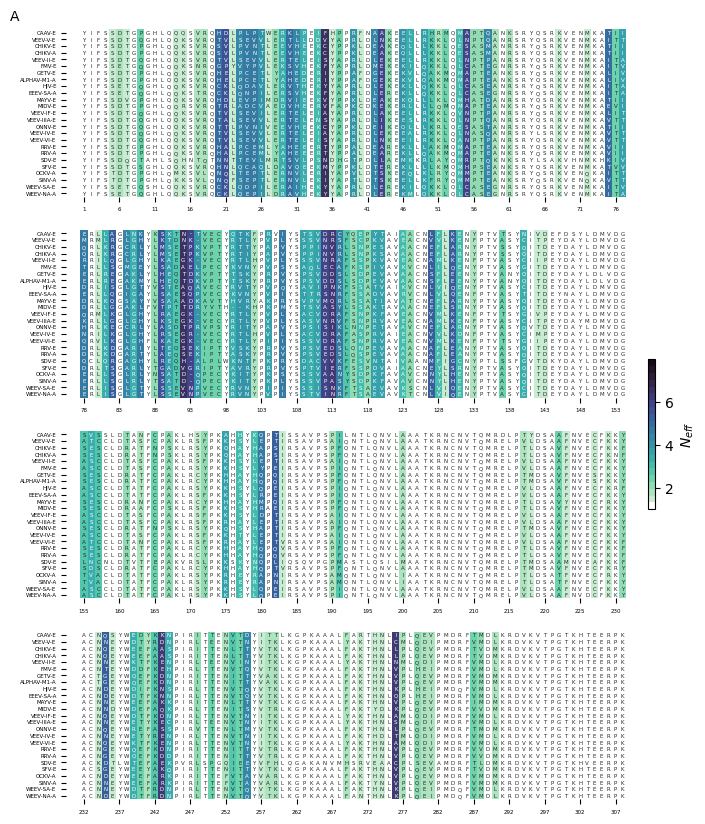

In [154]:
# Version 2
num_rows = 4
#fig, ax = plt.subplots(num_rows, 1, sharex=False, sharey=True, figsize=(7.5, 20), constrained_layout=True)
fig, ax = plt.subplots(num_rows, 1, sharex=False, sharey=True, figsize=(7.5, 10))

min_val = np.min(nsp4_mtx_val.values)
max_val = np.max(nsp4_mtx_val.values)

# rename columns of the alignemt to avoid inconsistence on the plot sizes, due the gap removed.
nsp4_mtx_annot_sites.columns = list(range(1, 612))
nsp4_mtx_val.columns = list(range(1, 612))


###############  subplots ##############
step = 77 
start = 1
stop = 308

for i in range(0, num_rows):
    st = start
    sp = start + (step-1)
    start = sp + 1
    if st < stop:
        sns.heatmap(
            nsp4_mtx_val.loc[:, st:sp], cmap=custom_palette, annot=nsp4_mtx_annot_sites.loc[:, st:sp], fmt='', 
            annot_kws={'size':4}, cbar=False, ax=ax[i], vmin=min_val, vmax=max_val)
        
        labels = nsp4_mtx_annot_sites.loc[:,st:sp].columns
        locations = np.arange(0, len(labels)) + 0.5

        ax[i].set_xticks(locations[::5], labels[::5], size=4, rotation=0)
        ax[i].set_yticks(y_label_idx, y_labels, size=4, rotation=0)
        ax[i].set_xlim(-2, 80)
 
##Figure text elements
cbar_ax = fig.add_axes([0.9, 0.4, 0.01, 0.15]) #(from leeft, from bottom, width, height)
fig.colorbar(ax[0].collections[0], cax=cbar_ax, location="right", shrink=0.005, fraction=0.05, label='$N_{eff}$')

# Add label 'A' on the top left of the figure
fig.text(0.05, 0.9, 'A', ha='left', va='top', fontsize=10)

plt.savefig('results/nsP4/heatmaps_alphavirus_neff_A.png', dpi=400, bbox_inches='tight')
plt.show()

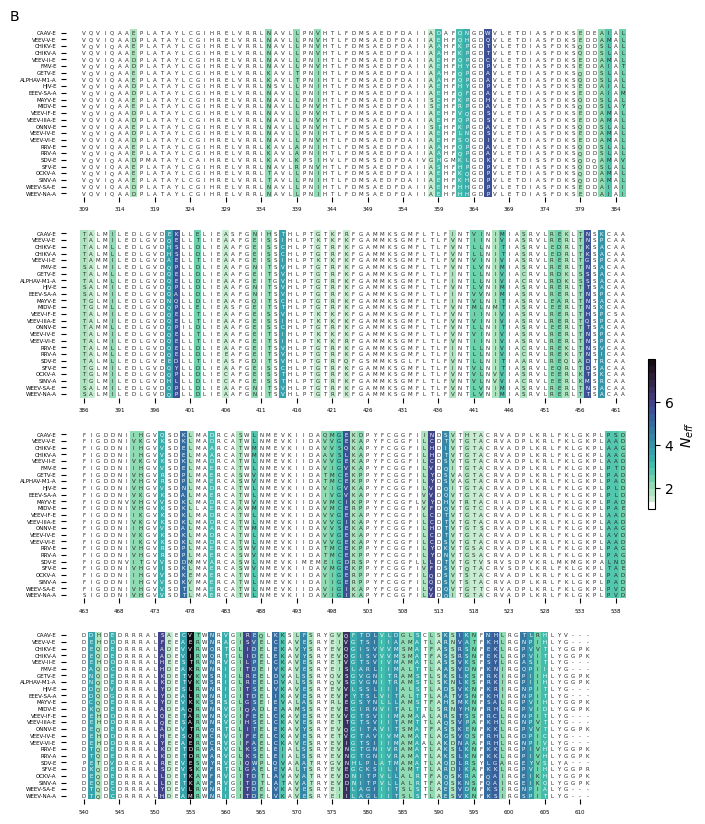

In [155]:
# Version 3
num_rows = 4
#fig, ax = plt.subplots(num_rows, 1, sharex=False, sharey=True, figsize=(7.5, 20), constrained_layout=True)
fig, ax = plt.subplots(num_rows, 1, sharex=False, sharey=True, figsize=(7.5, 10))

min_val = np.min(nsp4_mtx_val.values)
max_val = np.max(nsp4_mtx_val.values)

# rename columns of the alignemt to avoid inconsistence on the plot sizes, due the gap removed.
nsp4_mtx_annot_sites.columns = list(range(1, 612))
nsp4_mtx_val.columns = list(range(1, 612))


###############  subplots ##############
step = 77 
start = 309
stop = 611

for i in range(0, num_rows):
    st = start
    sp = start + (step-1)
    start = sp + 1
    if st < stop:
        sns.heatmap(
            nsp4_mtx_val.loc[:, st:sp], cmap=custom_palette, annot=nsp4_mtx_annot_sites.loc[:, st:sp], fmt='', 
            annot_kws={'size':4}, cbar=False, ax=ax[i], vmin=min_val, vmax=max_val)
        
        labels = nsp4_mtx_annot_sites.loc[:,st:sp].columns
        locations = np.arange(0, len(labels)) + 0.5

        ax[i].set_xticks(locations[::5], labels[::5], size=4, rotation=0)
        ax[i].set_yticks(y_label_idx, y_labels, size=4, rotation=0)
        ax[i].set_xlim(-2, 80)
 
##Figure text elements
cbar_ax = fig.add_axes([0.9, 0.4, 0.01, 0.15]) #(from leeft, from bottom, width, height)
fig.colorbar(ax[0].collections[0], cax=cbar_ax, location="right", shrink=0.005, fraction=0.05, label='$N_{eff}$')

# Add label 'A' on the top left of the figure
fig.text(0.05, 0.9, 'B', ha='left', va='top', fontsize=10)

plt.savefig('results/nsP4/heatmaps_alphavirus_neff_B.png', dpi=400, bbox_inches='tight')
plt.show()

## N-terminal region

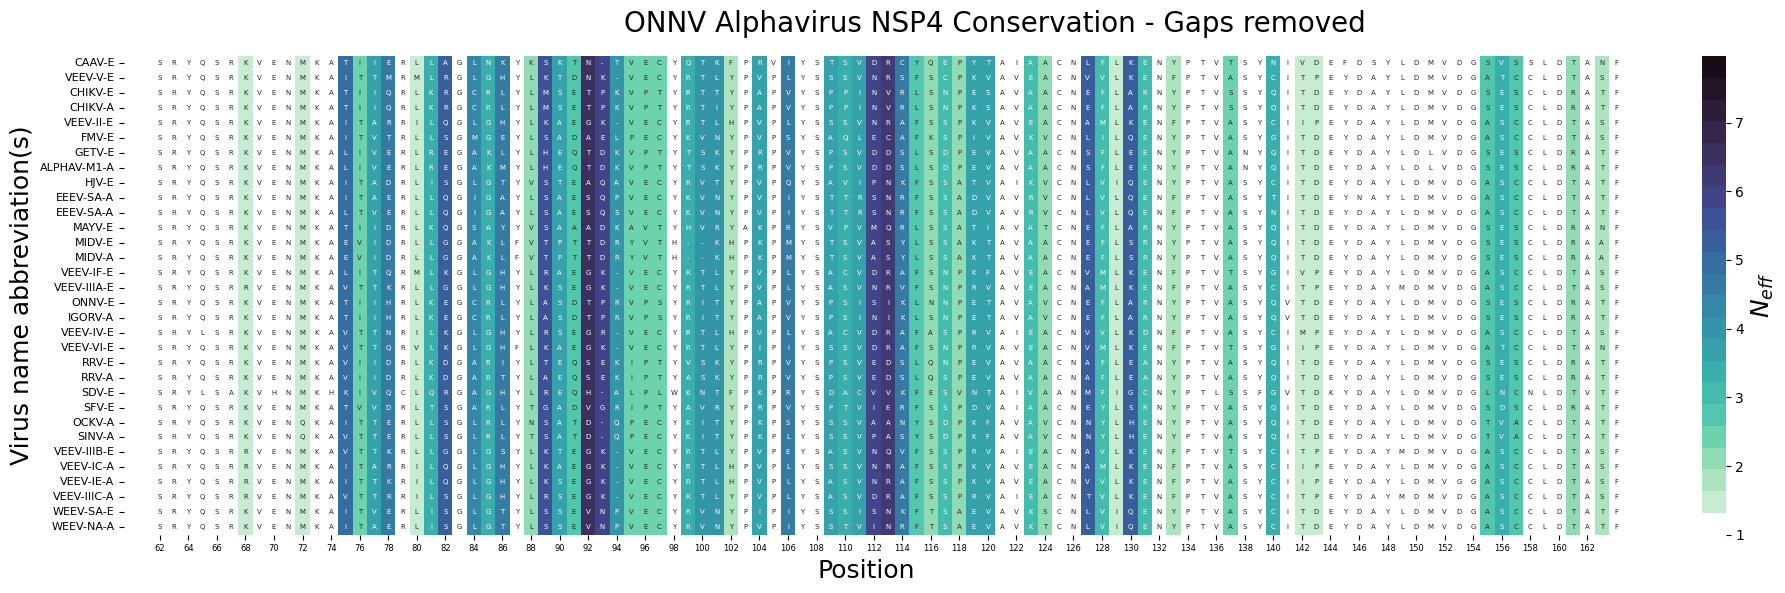

In [96]:
plt.figure(figsize=(20, 6))

start = 62
stop = 164

###############  subplot 1 ##############
fig = sns.heatmap(
    nsp4_mtx_val.loc[:, start:stop], cmap=custom_palette, annot=nsp4_mtx_annot_sites.loc[:, start:stop], fmt='',  
    annot_kws={'size':5}, cbar=True, vmin=min_val, vmax=max_val)

locations, _ = plt.xticks()
labels = nsp4_mtx_annot_sites.loc[:,start:stop].columns[::2]
#print(locations, labels)
plt.xticks(locations, labels, size=6, rotation=0)
plt.yticks(y_label_idx, y_labels, size=8, rotation=0)
plt.xlim(-2, 102)
plt.ylabel('Virus name abbreviation(s)', size=16, ha='center')


# Figure text elements
plt.suptitle('ONNV Alphavirus NSP4 Conservation - Gaps removed', size=20)
cbar = fig.collections[0].colorbar
cbar.set_label('$N_{eff}$', size=18)
plt.ylabel('Virus name abbreviation(s)', size=18, ha='center', rotation=90)
plt.xlabel('Position', size=18, ha='center', rotation=0)

plt.savefig('results/alphavirus/heatmaps_ONNV_alphavirus_extended_neff_hing.png', dpi=600)
plt.tight_layout()
plt.show()

In [ ]:
start = 60
stop = 161 +1

min_val = np.min(nsp4_mtx_val.values)
max_val = np.max(nsp4_mtx_val.values)

# rename columns of the alignemt to avoid inconsistence on the plot sizes, due the gap removed.
nsp4_mtx_annot_sites.columns = list(range(1, 612))
nsp4_mtx_val.columns = list(range(1, 612))

plt.figure(figsize=(20, 4))
plt.title('xLIR Motif Distribution on 3B\n', size=18)
ax = sns.heatmap(
    nsp4_mtx_val.iloc[:, start:stop], cmap=custom_palette, annot=nsp4_mtx_annot_sites.iloc[:, start:stop], fmt='', 
    annot_kws={'size':6}, cbar=False, cbar_kws={'label': 'PSSM Score', 'shrink': 0.5,}, vmin=min_val, vmax=max_val)

locations, labels = plt.xticks()
plt.xlabel('\nPosition', size=14)
plt.xticks(locations[::5], labels[::5], size=6, rotation=0)
#plt.xticks(locations[::3], np.arange(1, len(labels), 3), size=6, rotation=0)
plt.ylabel('Virus name abbreviation(s)\n', size=14)
plt.yticks(y_label_idx, y_labels, size=7, rotation=0)
plt.xlim(-2, 50)

fig = plt.gcf()
cbar_ax = fig.add_axes([0.89, 0.3, 0.01, 0.4])
plt.colorbar(ax.collections[0], cax=cbar_ax, location="right", shrink=0.03, label='PSSM Score')

#plt.tight_layout()
#plt.savefig('results/enterovirus/heatmaps/heatmaps_VOI_motifs_LIR_3B_v03.png', dpi=400, bbox_inches='tight')
plt.show()